In [751]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

In [752]:
df = pd.read_csv("Cleaned-HR-Employee-Attrition.csv")

In [753]:
df.shape

(1074, 33)

In [754]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,...,3,3,0,8,2,2,7,7,3,6


In [755]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,...,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,740.770019,34.714153,802.863128,9.198324,2.841713,1033.861266,2.718808,66.357542,2.725326,1.658287,...,3.159218,2.709497,0.790503,8.327747,2.810056,2.760708,5.133147,3.389199,0.967412,3.318436
std,431.856307,8.305852,402.222049,8.021683,1.033047,612.289787,1.093521,20.197919,0.717230,0.686436,...,0.366050,1.079921,0.868772,4.802593,1.313508,0.713014,3.723926,3.041698,1.278491,3.061515
min,0.000000,18.000000,103.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,362.250000,29.000000,465.500000,2.000000,2.000000,484.250000,2.000000,49.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
50%,734.500000,34.000000,805.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,8.000000,3.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,1121.750000,39.750000,1162.000000,14.000000,4.000000,1585.750000,4.000000,84.000000,3.000000,2.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,5.000000,1.000000,5.000000
max,1469.000000,60.000000,1498.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,3.000000,...,4.000000,4.000000,3.000000,23.000000,6.000000,4.000000,18.000000,16.000000,5.000000,17.000000


In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1074 non-null   int64 
 1   Age                       1074 non-null   int64 
 2   Attrition                 1074 non-null   object
 3   BusinessTravel            1074 non-null   object
 4   DailyRate                 1074 non-null   int64 
 5   Department                1074 non-null   object
 6   DistanceFromHome          1074 non-null   int64 
 7   Education                 1074 non-null   int64 
 8   EducationField            1074 non-null   object
 9   EmployeeNumber            1074 non-null   int64 
 10  EnvironmentSatisfaction   1074 non-null   int64 
 11  Gender                    1074 non-null   object
 12  HourlyRate                1074 non-null   int64 
 13  JobInvolvement            1074 non-null   int64 
 14  JobLevel                

In [757]:
# Re-encode so Yes = 1, No = 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [758]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,...,3,3,0,8,2,2,7,7,3,6


## Label Encoding

In [759]:
# Select all the columns that are not numeric
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [760]:
# View column categories
data_column_category

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [761]:
# Print the first five rows of the new dataframe
df[data_column_category].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No


In [762]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [763]:
label_encoder = LabelEncoder()

In [764]:
# Make a copy of your DataFrame
df_label_encoded = df.copy()

In [765]:
# Performing label encoding
for i in data_column_category:
    df_label_encoded[i] = label_encoder.fit_transform(df_label_encoded[i])

In [766]:
# View the label encoded data
print("Label Encoded Data: ")
df_label_encoded.head()

Label Encoded Data: 


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,5,...,3,3,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,1,2,2,1,8,...,3,3,0,8,2,2,7,7,3,6


In [767]:
df_label_encoded.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,5,...,3,3,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,1,2,2,1,8,...,3,3,0,8,2,2,7,7,3,6


## Correlation Matrix

In [768]:
# Assuming 'data' is your DataFrame and 'Attrition' is numeric (or encoded as such)
corr_matrix = df_label_encoded.corr()['Attrition']
print(corr_matrix)

Unnamed: 0                 -0.018665
Age                        -0.180324
Attrition                   1.000000
BusinessTravel             -0.000380
DailyRate                  -0.044980
Department                  0.048934
DistanceFromHome            0.100353
Education                  -0.032757
EducationField              0.032088
EmployeeNumber             -0.019059
EnvironmentSatisfaction    -0.115010
Gender                      0.018393
HourlyRate                 -0.001972
JobInvolvement             -0.145100
JobLevel                   -0.168133
JobRole                     0.032166
JobSatisfaction            -0.140488
MaritalStatus               0.163030
MonthlyIncome              -0.163596
MonthlyRate                 0.032200
NumCompaniesWorked          0.040166
OverTime                    0.240490
PercentSalaryHike          -0.012910
PerformanceRating           0.023889
RelationshipSatisfaction   -0.069119
StockOptionLevel           -0.159709
TotalWorkingYears          -0.209392
T

In [769]:
corr_matrix.shape

(33,)

In [770]:
# Identify columns to remove
cols_to_remove = corr_matrix[corr_matrix.abs() < 0.1].index.tolist()

print(f"Columns to be removed ({len(cols_to_remove)}): {cols_to_remove}")

Columns to be removed (18): ['Unnamed: 0', 'BusinessTravel', 'DailyRate', 'Department', 'Education', 'EducationField', 'EmployeeNumber', 'Gender', 'HourlyRate', 'JobRole', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion']


In [771]:
df = df.drop(columns=cols_to_remove)

In [772]:
df.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1,2,3,2,4,Single,5993,Yes,0,8,6,4,5
1,49,0,8,3,2,2,2,Married,5130,No,1,10,10,7,7
2,37,1,2,4,2,1,3,Single,2090,Yes,0,7,0,0,0
3,33,0,3,4,3,1,3,Married,2909,Yes,0,8,8,7,0
4,32,0,2,4,3,1,4,Single,3068,No,0,8,7,7,6


## One-Hot Encoding

In [773]:
# Select all the columns that are not numeric
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [774]:
data_column_category

Index(['MaritalStatus', 'OverTime'], dtype='object')

In [775]:
# Print the first five rows of the new dataframe
df[data_column_category].head()

,MaritalStatus,OverTime
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,Yes
4,Single,No


In [776]:
df_onehot_getdummies = pd.get_dummies(df[data_column_category], prefix=data_column_category)

In [777]:
data_column_number = df.select_dtypes(include=[np.number]).columns

In [778]:
data_column_number

Index(['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [779]:
# Print the first five rows of the new dataframe
df[data_column_number].head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1,2,3,2,4,5993,0,8,6,4,5
1,49,0,8,3,2,2,2,5130,1,10,10,7,7
2,37,1,2,4,2,1,3,2090,0,7,0,0,0
3,33,0,3,4,3,1,3,2909,0,8,8,7,0
4,32,0,2,4,3,1,4,3068,0,8,7,7,6


In [780]:
df_onehot_encoded = pd.concat([df_onehot_getdummies,df[data_column_number]],axis = 1)

In [781]:
df_onehot_encoded.columns

Index(['MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age',
       'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [782]:
df_onehot_encoded

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,False,False,True,False,True,41,1,1,2,3,2,4,5993,0,8,6,4,5
1,False,True,False,True,False,49,0,8,3,2,2,2,5130,1,10,10,7,7
2,False,False,True,False,True,37,1,2,4,2,1,3,2090,0,7,0,0,0
3,False,True,False,False,True,33,0,3,4,3,1,3,2909,0,8,8,7,0
4,False,False,True,True,False,32,0,2,4,3,1,4,3068,0,8,7,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,False,True,False,True,False,36,0,23,3,4,2,4,2571,1,17,5,2,3
1070,False,True,False,True,False,39,0,6,4,2,3,1,9991,1,9,7,7,7
1071,False,True,False,False,True,27,0,4,2,4,2,2,6142,1,6,6,2,3
1072,False,True,False,True,False,49,0,2,4,2,2,2,5390,0,17,9,6,8


In [783]:
# Move 'Attrition' column to the end
cols = [col for col in df_onehot_encoded.columns if col != 'Attrition'] + ['Attrition']
df_onehot_encoded = df_onehot_encoded[cols]

In [784]:
df_onehot_encoded.head()

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Attrition
0,False,False,True,False,True,41,1,2,3,2,4,5993,0,8,6,4,5,1
1,False,True,False,True,False,49,8,3,2,2,2,5130,1,10,10,7,7,0
2,False,False,True,False,True,37,2,4,2,1,3,2090,0,7,0,0,0,1
3,False,True,False,False,True,33,3,4,3,1,3,2909,0,8,8,7,0,0
4,False,False,True,True,False,32,2,4,3,1,4,3068,0,8,7,7,6,0


In [785]:
array = df_onehot_encoded.values

In [786]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-2], np.argmax(array[:, -2:], axis=1)

In [787]:
print(X.shape)
print(y.shape)

(1074, 16)
(1074,)


In [788]:
# Separate input data into classes based on labels of 'Attrition'
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])

In [789]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.2

In [790]:
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [791]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [792]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(859, 16)
(859,)
(215, 16)
(215,)


In [793]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [794]:
# draw tree from the trained data by graphviz package
import graphviz

num_feature_names = X.shape[1]

dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=df_onehot_encoded.columns[:num_feature_names], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)

In [795]:
# result DT saved in file heart.pdf
graph = graphviz.Source(dot_data)
graph.render("company2") 

'company2.pdf'

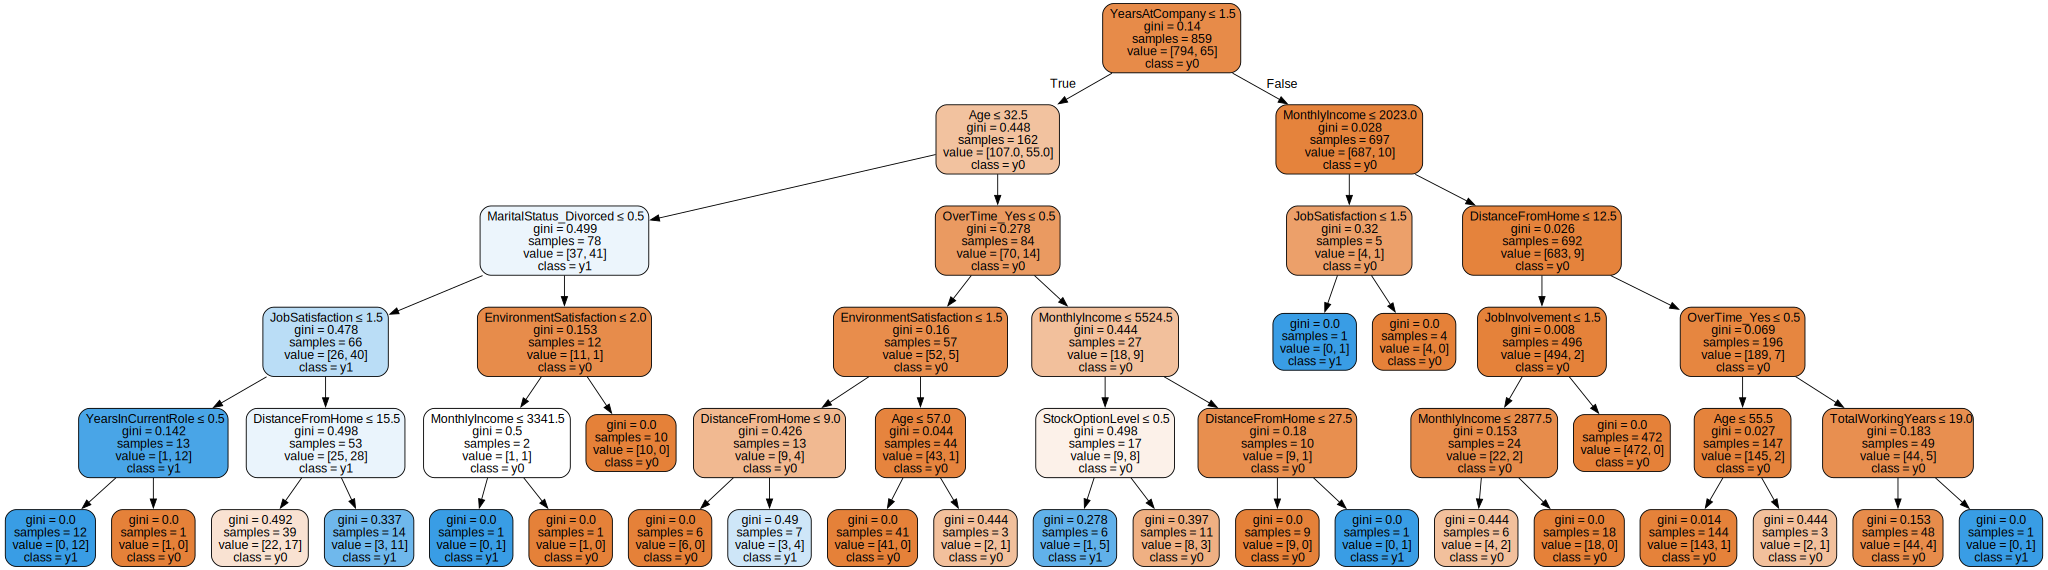

In [796]:
# show it here
graph

## Step 5. Model Validation

In [797]:
# Set the metrics
scoring = 'accuracy'

In [798]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [799]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.9395348837209302


In [800]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[197,   5],
       [  8,   5]], dtype=int64)

In [801]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0,1
row_0,,
0,197,5
1,8,5


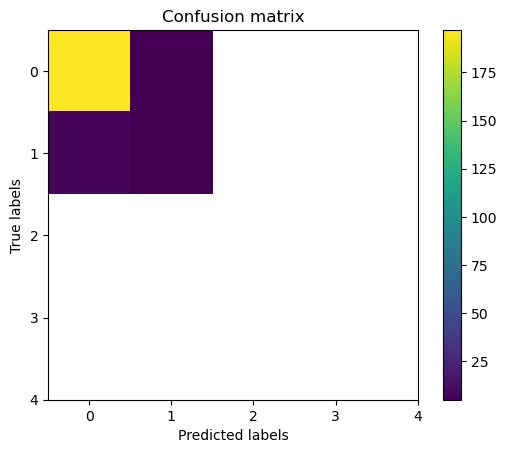

In [802]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

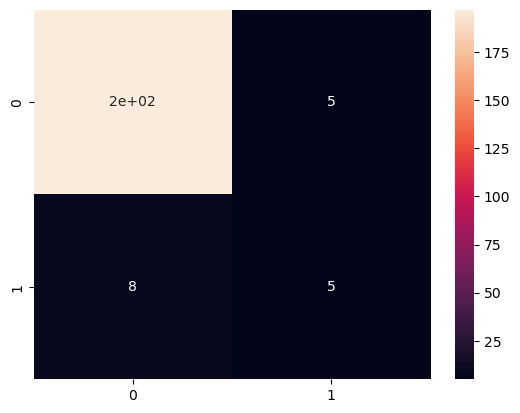

In [803]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [804]:
class_names = ['No Attrition', 'Attrition']
# Classifier performance on training dataset
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

No Attrition       0.96      0.99      0.98       794
   Attrition       0.84      0.55      0.67        65

    accuracy                           0.96       859
   macro avg       0.90      0.77      0.82       859
weighted avg       0.95      0.96      0.95       859



In [805]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

No Attrition       0.96      0.98      0.97       202
   Attrition       0.50      0.38      0.43        13

    accuracy                           0.94       215
   macro avg       0.73      0.68      0.70       215
weighted avg       0.93      0.94      0.94       215

